In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
%matplotlib inline


In [5]:
cv2.__version__

'4.2.0'

In [6]:
np.__version__

'1.16.2'

In [7]:
pd.__version__

'0.24.2'

In [8]:
sns.__version__

'0.9.0'

In [9]:
import matplotlib
matplotlib.__version__

'3.0.3'

In [10]:
# write all the version in requirent.txt file for future use 

In [11]:
!ls images/val/

clean
messy


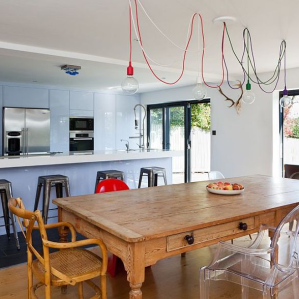

In [12]:
from PIL import Image
Image.open("images/train/clean/1.png")

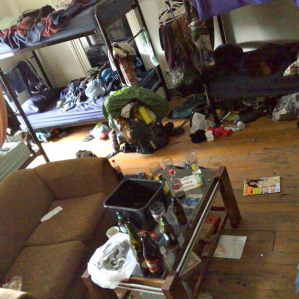

In [13]:
Image.open("images/train/messy/1.png")

In [14]:
img=plt.imread("images/train/clean/1.png")
img

array([[[0.7019608 , 0.68235296, 0.6666667 ],
        [0.69803923, 0.6784314 , 0.6627451 ],
        [0.69803923, 0.6784314 , 0.6627451 ],
        ...,
        [0.79607844, 0.76862746, 0.7294118 ],
        [0.79607844, 0.76862746, 0.7294118 ],
        [0.8       , 0.77254903, 0.73333335]],

       [[0.7019608 , 0.68235296, 0.6666667 ],
        [0.7019608 , 0.68235296, 0.6666667 ],
        [0.7019608 , 0.68235296, 0.6666667 ],
        ...,
        [0.79607844, 0.76862746, 0.7294118 ],
        [0.7921569 , 0.7647059 , 0.7254902 ],
        [0.7882353 , 0.7607843 , 0.72156864]],

       [[0.69411767, 0.6745098 , 0.65882355],
        [0.69411767, 0.6745098 , 0.65882355],
        [0.69411767, 0.6745098 , 0.65882355],
        ...,
        [0.7921569 , 0.7647059 , 0.7254902 ],
        [0.7921569 , 0.7647059 , 0.7254902 ],
        [0.7921569 , 0.7647059 , 0.7254902 ]],

       ...,

       [[0.5568628 , 0.37254903, 0.19215687],
        [0.5686275 , 0.38431373, 0.2       ],
        [0.5764706 , 0

In [15]:
print(type(img))

<class 'numpy.ndarray'>


In [16]:
img=cv2.imread("images/train/clean/1.png")

In [17]:
img.shape

(299, 299, 3)

In [18]:
img=cv2.resize(img,(299,299))

In [19]:
a=np.array([1,2,3,4])
b=np.array([1,2,3,4])
c=np.array([1,2,3,4])

f=np.concatenate([a,b,c])
f

array([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4])

In [20]:
import os

In [21]:
path="images/train/clean"
def read_image(path,label):
    images=[]
    for filename in os.listdir(path):
        file_path=os.path.join(path,filename)
        img=cv2.resize(cv2.imread(file_path,cv2.IMREAD_GRAYSCALE),(200,200))
        images.append(img)
    images=np.concatenate(images)
    labels=np.array([label for _ in range(len(images))])
    return images,labels

In [22]:
clean_images,clean_labels=read_image("images/train/clean",1)

In [23]:
clean_images.shape

(19200, 200)

In [24]:
messay_images,messay_labels=read_image("images/train/messy",2)

In [25]:
feature=np.concatenate([clean_images,messay_images])
target=np.concatenate([clean_labels,messay_labels])

In [26]:
target

array([1, 1, 1, ..., 2, 2, 2])

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model=LogisticRegression()

In [30]:
model.fit(feature,target)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
test_image=cv2.resize(cv2.imread("images/test/6.png",cv2.IMREAD_GRAYSCALE),(200,200))

In [33]:
y_pred=model.predict(test_image)

In [34]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [35]:
clean=np.mean(y_pred==1)*100
messy=np.mean(y_pred==2)*100

In [36]:
def accuracy(y_pred):
    clean=np.mean(y_pred==1)*100
    messy=np.mean(y_pred==2)*100
    print("chaces of clean image",clean)
    print("chances of messy images",messy)

In [38]:
from sklearn.metrics import classification_report